In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [26]:
symbol = 'EURUSD=X'
start_date = '2021-01-01'
end_date = '2023-01-01'

In [27]:
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [23]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,1.122083,0
2020-01-02,1.121894,1.122712,1.116682,1.122083,1.122083,0
2020-01-03,1.117081,1.118068,1.112570,1.117144,1.117144,0
2020-01-06,1.116246,1.120825,1.115810,1.116196,1.116196,0
2020-01-07,1.119583,1.119946,1.113487,1.119799,1.119799,0
...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,1.066780,0
2022-12-27,1.064022,1.066900,1.061244,1.064022,1.064022,0
2022-12-28,1.063717,1.067430,1.061391,1.063717,1.063717,0


In [30]:
# Calcul des bandes de Bollinger
data['MA20'] = data['Close'].rolling(window=20).mean()
data['UpperBand'] = data['MA20'] + 1.5 * data['Close'].rolling(window=20).std()
data['LowerBand'] = data['MA20'] - 1.5 * data['Close'].rolling(window=20).std()

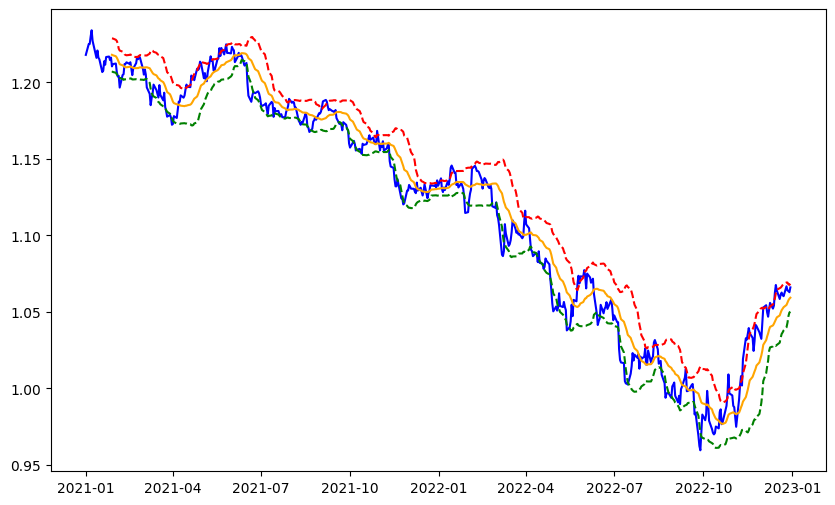

In [31]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['MA20'], label='20-day Moving Average', color='orange')
plt.plot(data.index, data['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='dashed')
plt.plot(data.index, data['LowerBand'], label='Lower Bollinger Band', color='green', linestyle='dashed')